# Self Organizing Maps

In [1]:
import numpy as np

# graphics
import matplotlib.pyplot as plt
# import matplotlib as mpl
from IPython.display import display, Image

# contour plots 
import matplotlib.cm as cm

# 3D plots
from mpl_toolkits.mplot3d.axes3d import Axes3D

import sys # system library
sys.path.append('./lib_nn') # my path (linux, Mac OS)

from neural import * # import my library packages

Invoking __init__.py for neural


A very important and ingenious application of unsupervised learning are the so-called **Kohonen nets** ([Teuvo Kohonen](https://en.wikipedia.org/wiki/Teuvo_Kohonen), i.e. **self-organizing mappings (SOM)**. Consider a mapping between a set of $n$-dimensional input data $D$ (continuous or discrete) and a **discrete** $k$-dimensional set (**grid**) of neurons. Since $N$ is descrete, each neuron carrries an index consisting of $k$ natural numbers, denoted as $\bar {i} = (i_1, i_2, ..., i_k)$. Typically, the dimensions satisfy $n \ge k$. When $n > k$, one talks about **reduction of dimensionality**, as the input space $D$ has more dimensions than the grid of neurons. 

Two examples of such networks are visualized in {numref]`koh-fig`. The left panel shows a 2-dim. input space $D$, and a one dimensional grid on neurons. The input point $(x_1,x_2)$ enters all the neuron of the grid, and one of them (with best-suited weights) becomes the winner (red dot). The gray oval indicates the neighborhood of the winner. The right panel shows an analogous situation for the case of a 3-dim. input and 2-dim. grid of neurons. Here, for clarity, we only indicated the edges entering the winner, but they also enter all the other neurons, as in the left panel. 

:::{figure-md} koh-fig

<img src="images/koha.png" width="500px">

Example of Kohonen networks. Left: 1-dim. grid of neurons $N$ and 2-dim. input space $D$. Right: 2-dim. grid of neurons $N$ and 3-dim. input space $D$. The red dot indicates the winner, and the gray oval marks its neighborhood.
:::

One defines the neuron **proximity function**, $\phi (\bar {i}, \bar {j})$, which assigns, to a pair of neurons, a real number depending on their relative position in the grid. This function must decrease with the distance between the neuron indices. A popular choice is a Gaussian,

$$ \phi(\bar{i}, \bar{j})=\exp\left [ -\frac{(i_1-j_1)^2+...+(i_k-j_k)^2}{2 \delta^2} \right ] ,$$

where $\delta$ is the **neighborhood radius**. For a 1-dim. grid it becomes $ \phi(i,j)=\exp\left [ -\frac{(i-j)^2}{2 \delta^2} \right ]$.

## Kohonen's algorithm

The set up of Kohonen's algorithm is similar to the unsupervised learning discussed in the previous chapter. Each neuron has weights, which are elements of $D$, i.e. form $n$-dimensional vectors. One may simply think of this as placing the neurons in some locations in $D$. When an input point $P$ form $D$ is fed into the network, one looks for a closest neuron, which becomes the **winner**, exactly as in the algorithm from section {ref}`inn-sec`. However, here comes an important differeence: Not only the winner is attracted a bit towards $P$, but also its neighbors, to a lesser and lesser extent the farther they are from the winner.

```{admonition} Winner-take-most strategy
:class: important

Kohonen's algorithm involves the "winner take most" strategy, where not only the winner neuron is updated (as in the winner-take-all case), but also its neighbors. The neighbors update is strongest for the nearest neighbors, and gradually weakens with the distance from the winner.  
```

```{admonition} Kohnen's algorithm
:class: important

0. Initialize (for instance randomly) $n$-dimensional weights $w_i$, $i-1,\dots,m$ for all the $m$ neurons in the grid. Set an initial neighborhood radius $ \delta $ and an initial learning speed $ \varepsilon $.

1. Choose (randomly) a data point $P$ wigh coordinates $x$ from the input space (possibly with an appropriate probability distribution).

2. Find the $ \bar {l} $ neuron (the winner) for which the distance from $P$ is the smallest.

3. The weights of the winner and its neighbors are updated according to the **winner-take-most** recipe:

$$w_{\bar{i}} \to w_{\bar{i}} + \varepsilon \phi(\bar{i}, \bar{l})(x - w_{\bar{i}}), \hspace{1cm} i=1, . . . , m. 
$$

4. Loop from $1.$ for a specified number of points. 

5. Repeat from $1.$ in rounds, until a satisfactory result is obtained or the maximum number of rounds is reached. In each round  **reduce** $ \varepsilon $ and $ \delta $ according to a chosen policy. 
```

The way the reduction of $ \varepsilon $ and $ \delta $ is done is very important for the desired outcome of the algorithm (see exercises). 


###  2-dim. data and 1-dim. neuron grid

Let us see how the procedure works on a simple example. We map a grid of **num** neurons into (our favorite!) circle. So we have here the reduction of dimensions: $n=2$, $k=1$. 

In [2]:
num=100 # number of neurons

The proximity function

In [3]:
def phi(i,k,d):                       # proximity function
    return np.exp(-(i-k)**2/(2*d**2)) # Gaussian

looks as follows around $k=50$ and for the width parameter $\delta=5$:

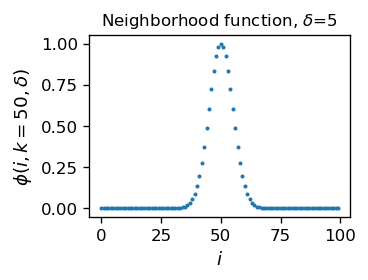

In [4]:
k=50
d=5

plt.figure(figsize=(2.8,2),dpi=120)
plt.title("Neighborhood function, $\delta$="+str(d),fontsize=10) 

ind=[i for i in range(num)]
ph= [phi(i,k,d) for i in range(num)]

plt.scatter(ind,ph,s=2)

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$\phi(i,k=$'+str(k)+'$,\delta)$',fontsize=11);    

As a feature of the Gaussian, at $|k-i|=\delta$ it drops to $~60\%$ of the central value, and at $|k-i|=3\delta$ to $~1\%$, a tiny fraction. Hence $\delta$ controls the size of the neighborhood of the winner. The neuron farther away from the winner than $3\delta$ are practically left unupdated. 

We initiate the network by by placing the grid on the plane (on the square $[0,1]\times [0,1]$), with a random location of each neuron. The line is drawn to guide the eye along the neuron indices: $1,2,3,\dots m$,  which are chaotically distributed.

In [5]:
W=np.array([func.point_c() for _ in range(num)]) # random initialization of weights

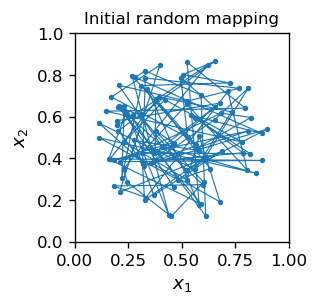

In [6]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("Initial random mapping",fontsize=10) 
plt.xlim(0,1)
plt.ylim(0,1)

plt.scatter(W[:,0],W[:,1],s=5)
plt.plot(W[:,0],W[:,1],linewidth=0.7)

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);    

The line connects the subsequent neurons ... They are chaotically scattered around the region.

In [7]:
eps=.5   # initial learning speed (0.5)
de = 10  # initial neighborhood distance (10)
ste=0    # inital number of caried out steps

In [8]:
# Kohonen's algorithm
for _ in range(150): # rounds
    eps=eps*.98      # dicrease learning speed
    de=de*.95        # ... and the neighborhood distance
    for _ in range(100):        # loop over points
        p=func.point_c()        # random point
        ste=ste+1               # steps
        dist=[func.eucl(p,W[k]) for k in range(num)] 
         # array of squares of Euclidean disances between p and the neuron locations
        ind_min = np.argmin(dist) # index of the winner
        for k in range(num):      # for all the neurons
            W[k]+=eps*phi(ind_min,k,de)*(p-W[k]) 
             # update of the neuron locations (weights), depending on proximity

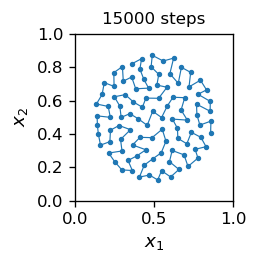

In [9]:
fk=plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title(str(ste)+" steps",fontsize=10) 
plt.xlim(0,1)
plt.ylim(0,1)
 
plt.scatter(W[:,0],W[:,1],s=5)
plt.plot(W[:,0],W[:,1],linewidth=0.7)

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11)
plt.tight_layout();    

In [10]:
# fk.savefig('images/ka200000.png');

As the algorith progresses (see {numref}`kohstory-fig`) the neuron grid first "straightens up", and then gradually fills the whole space $D$ (circle) in such a way that the neurons with adjacent indices are located close to each other. 
Figuratively speaking, a new point $x$ attracts towerds itself the nearest neuron (the winner), and to a weaker extent its neighbors. At the beginning of the algorithm the neighborhood distance **de** is large, so large chunks of the nighboring point in input grid are pulled together, and the arrangement looks as the top right corner of {numref}`kohstory-fig`. At later stages **de** is smaller, so only the winner and possibly its immediate neighbors are attracted to a new point. 
After completion, individual neurons "specialize" (are close to) in a certain data area. 

In the present example, after about 20000 steps the result practically stops to change. 

:::{figure-md} kohstory-fig

<img src="images/kaall.png" width="800px">


Progress of Kohonen's algorithm. The line, drawn to guide the eye, connects neurons with adjaceny indices.
:::

```{admonition} Kohonen network as a classifier
:class: note

Having the trained network, we may use it as classifier similarly as in chapter {\ref}`un-lab`. We label a point from $D$ with the index of the nearest neuron.
```

The plots in {numref}`kohstory-fig` are plotted in coordinates $(x_1,x_2)$, that is, from the "point of view" of the $D$-space. One may also look at the result from the point of view of the $N$-space, i.e. plot $x_1$ and $x_2$ as functions of the neuron index $i$: 

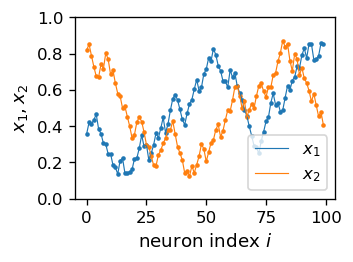

In [11]:
tn = [i for i in range(num)]

plt.figure(figsize=(2.8,2),dpi=120)
#plt.title("Kohonen network",fontsize=11) 
#plt.xlim(0,1)
plt.ylim(0,1)

plt.scatter(tn,W[:,0],s=3)
plt.plot(tn,W[:,0],linewidth=0.7)

plt.scatter(tn,W[:,1],s=3)
plt.plot(tn,W[:,1],linewidth=0.7)

plt.xlabel('neuron index $i$',fontsize=11)
plt.ylabel('$x_1,x_2$',fontsize=11)

plt.legend(('$x_1$','$x_2$'),fontsize=10);    

We note that the jumps in the above plotted curves are small. This can be seen quntitatively in the histogram below, where the average distance is about 0.07.

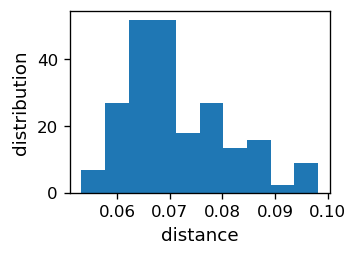

In [12]:
dd=[np.sqrt((W[i+1,0]-W[i,0])**2+(W[i+1,1]-W[i,1])**2) for i in range(num-1)]
        # array of distances between subsequent neurons in the grid

plt.figure(figsize=(2.8,2),dpi=120)

plt.xlabel('distance',fontsize=11)
plt.ylabel('distribution',fontsize=11)

plt.hist(dd, bins=10, density=True);   # histogram

```{admonition} Remarks
:class: note 

- We took a situation in which the data space with the dimension $n = 2$ is "sampled" by a discrete set of neurons forming  $k=1$-dimensional grid. Hence we have dimensional reduction.

- The outcome of the algorithm is a network in which a given neuron "focuses" on data from its vicinity. In a general case where the data are non-uniformly distributed, the neurons would fill the area containing more data more densely.

- The fact that there are no line intersections is a manifestation of topological features, discussed in detail below. 

- The policy of choosing initial $\delta$ and $\varepsilon $ parameters and reducing them appropriately in subsequent rounds is based on experience and non-trivial.

- The final result is not unequivocal, i.e. running the algorithm with a different initialization of the weights (positions of neurons) yields a different outcome, equally "good".

- Finally, the progress and result of the algorithm is reminiscent of the construction of the [Peano curve](https://en.wikipedia.org/wiki/Peano_curve) in mathematics, which fills an area with a line.
```

### 2 dim. color map

Now we come a case of 3-dim. data and 2-dim. neuron grid, which is a situation from the right panel of {numref}`koh-fig`. An RGB color is described with three numbers from $[0,1]$, so it can nicely serve as input in our example.

The distance squared between two colors (this is just a distance between two points in the 3-dim. space) is taken in the Euclidean form 

In [13]:
def dist3(p1,p2): 
    """
    Square of the Euclidean distance between points p1 and p2
    in 3 dimensions.
    """
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2

In [14]:
def phi2(ix,iy,kx,ky,d):  # proximity function for 2-dim. grid
    return np.exp(-((ix-kx)**2+(iy-ky)**2)/(d**2))  # Gaussian

In [84]:
def rgbn():
    r,g,b=np.random.random(),np.random.random(),np.random.random()
    norm=np.sqrt(r*r+g*g+b*b)
    return np.array([r,g,b]/norm)

In [85]:
rgbn()

array([0.1234176 , 0.55504897, 0.82261093])

Next, we generate a sample of **ns** points with RGB colors:

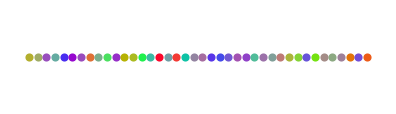

In [94]:
ns=40  # number of colors in the sample

samp=[rgbn() for _ in range(ns)]
       # random sample

pls=plt.figure(figsize=(4,1),dpi=120)
plt.axis('off')
for i in range(ns): plt.scatter(i,0,color=samp[i], s=15); 

We use **size** x **size** grid of neurons. Each neuron's position (color, or weight) in the 3-dim. space is initialized randomly:

In [95]:
size=40  # neuron array of size x size (40 x 40)

tab=np.zeros((size,size,3)) 

for i in range(size):          # i index in the grid    
    for j in range(size):      # j index in the grid
        for k in range(3):     # RGB: 0-red, 1-green, 2-blue
            tab[i,j,k]=np.random.random() # random number form [0,1]
            # 3 RGB components for neuron in the grid positin (i,j)

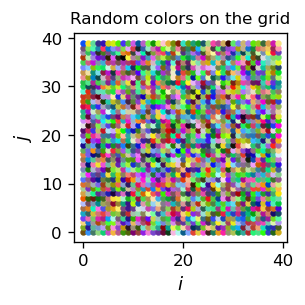

In [96]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("Random colors on the grid",fontsize=10) 

for i in range(size):
    for j in range(size):
        plt.scatter(i,j,color=tab[i][j], s=8) 
plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

Now we are ready to run Kohonen's algorithm:

In [97]:
eps=.5   # initial parameters
de = 20   

In [98]:
for _ in range(100):    # rounds
    eps=eps*.99      
    de=de*.96        
    for s in range(ns): # loop over the points in the data sample       
        p=samp[s]       # point from the sample
#        p=[np.random.random() for _ in range(3)]
        dist=[[dist3(p,tab[i][j]) for j in range(size)] for i in range(size)] 
                        # distance to all neurons
        ind_min = np.argmin(dist) # the winner index
        ind_x=ind_min//size       # a trick to get a 2-dim index
        ind_y=ind_min%size

        for j in range(size): 
            for i in range(size):
                tab[i][j]+=eps*phi2(ind_x,ind_y,i,j,de)*(p-tab[i][j]) # update         

In [99]:
eps,de

(0.18301617063661463, 0.33740638717699184)

As a result we get an arrangement of our color sample in two dimensions in such a way that the neighboring areas have a similar color:

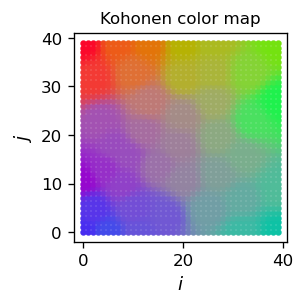

In [100]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("Kohonen color map",fontsize=10) 

for i in range(size):
    for j in range(size):
        plt.scatter(i,j,color=tab[i][j], s=8)

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

```{admonition} Remarks
:class: note

- The areas for the individual colors of the sample have a comparable area. Generally, the area is proportional to the sample size.

- To get sharper boundaries between regions, de has to shrink faster than eps. Then, in the final stage of learning, the neuron update process takes place with small neighborhood radius.
```

## Unified distance matrix

A way to present the results of the Kohonen algorithm as via the **unified distance matrix**.

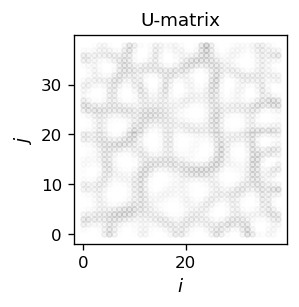

In [21]:
udm=np.zeros((size-1,size-1))

sc=0.25

for i in range(size-1):
    for j in range(size-1):
        udm[i][j]=sc*np.sqrt(dist3(tab[i][j],tab[i][j+1])+
                            dist3(tab[i][j+1],tab[i+1][j+1])+
                            dist3(tab[i+1][j+1],tab[i+1][j])+
                            dist3(tab[i+1][j],tab[i][j]))
        # sum of squares of distances around the plaquette
        
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("U-matrix",fontsize=11) 

for i in range(size-1):
    for j in range(size-1):
        plt.scatter(i,j,color=[0,0,0,udm[i][j]], s=10) 

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

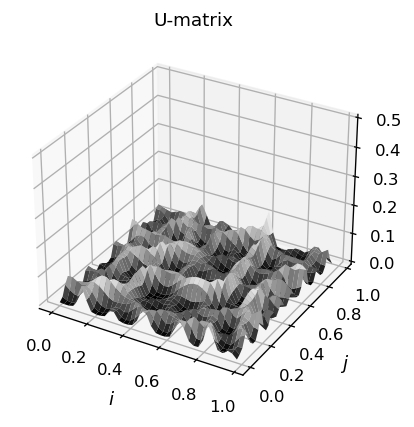

In [22]:
fig = plt.figure(figsize=(4,4),dpi=120)
axes1 = fig.add_subplot(111, projection="3d")
ax = fig.gca(projection='3d')

xx_1 = np.arange(0, 1, 1./(size-1))
xx_2 = np.arange(0, 1, 1./(size-1))

x_1, x_2 = np.meshgrid(xx_1, xx_2)

Z=np.array([[udm[i][j] for i in range(size-1)] for j in range(size-1)])

ax.set_zlim(0,.5)

ax.plot_surface(x_1,x_2, Z, cmap=cm.gray)

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

plt.title("U-matrix",fontsize=11);


Distance map for a given (new) data point (i.e. using a classifier)

In [23]:
nd=[np.random.random(),np.random.random(),np.random.random()]

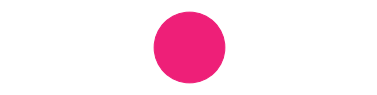

In [24]:
plt.figure(figsize=(6.5,1.5))

plt.axis('off')
plt.scatter(0,0,color=nd, s=5000); 

Classification of the point according to the previously obtained map

In [25]:
tad=np.zeros((size,size))

for i in range(size):
    for j in range(size):
        tad[i][j]=dist3(nd,tab[i][j])
        

ind_m = np.argmin(tad) # winner
in_x=ind_m//size      
in_y=ind_m%size 

da=np.sqrt(tad[in_x][in_y])

print("Closest neuron grid coordinates: (",in_x,",",in_y,")")
print("Distance: ",np.round(da,3))

Closest neuron grid coordinates: ( 0 , 20 )
Distance:  0.213


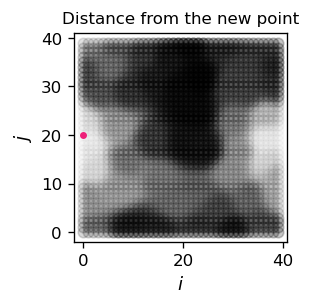

In [26]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("Distance from the new point",fontsize=10) 

for i in range(size):
    for j in range(size):
        plt.scatter(i,j,color=[0,0,0,tad[i][j]/3], s=40) 
        
plt.scatter(in_x,in_y,color=nd, s=10) 

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

### Mapping colors on a line

Reduction of three dimensions into one

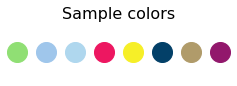

In [27]:
ns=8
# random sample
samp=[[np.random.random(),np.random.random(),np.random.random()] for _ in range(ns)]

plt.figure(figsize=(4,1))
plt.title("Sample colors",fontsize=16) 

plt.axis('off')

for i in range(ns):
    plt.scatter(i,0,color=samp[i], s=400);

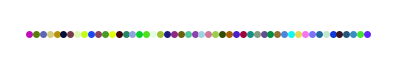

In [28]:
si=50  # 1D array of si neurons

tab2=np.zeros((si,3))

for i in range(si):      
    for k in range(3): # 3 RGB components
        tab2[i][k]=np.random.random() # random initialization

plt.figure(figsize=(4,0.5),dpi=120)
plt.axis('off')

for i in range(si):
    plt.scatter(i,0,color=tab2[i], s=25000/si**2); 

In [29]:
eps=.5    
de = 20   

In [31]:
for _ in range(100): 
    eps=eps*.99      
    de=de*.96        
    for s in range(ns):       
        p=samp[s] # point from the sample
        dist=[dist3(p,tab2[i]) for i in range(si)] 
        ind_min = np.argmin(dist)          
        for i in range(si):
            tab2[i]+=eps*phi(ind_min,i,de)*(p-tab2[i]) 

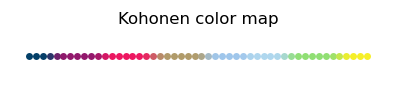

In [32]:
plt.figure(figsize=(4,.5),dpi=120)
plt.title("Kohonen color map",fontsize=10) 
plt.axis('off')

for i in range(si):
    plt.scatter(i,0,color=tab2[i], s=10); 

Smooth transition between colors.

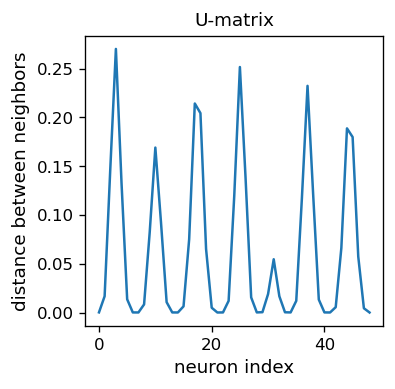

In [33]:
xr=np.array([i for i in range(si-1)])

ta2=np.zeros(si-1)

for i in range(si-1):
    ta2[i]=np.sqrt(dist3(tab2[i],tab2[i+1]))
        
plt.figure(figsize=(3.2,3.2),dpi=120)
plt.title("U-matrix",fontsize=11) 

plt.plot(xr,ta2) 

plt.xlabel('neuron index',fontsize=11)
plt.ylabel('distance between neighbors',fontsize=11);

The minima correspond to the individual colors of the sample. The height of the separating peaks shows how much the colors differ.

The most similar colors are not necessarily adjacent. The behavior depends on the value of the de parameter.

### Wikipedia articles' similarity

Reduction from very many parameters into 2. U-matrix.

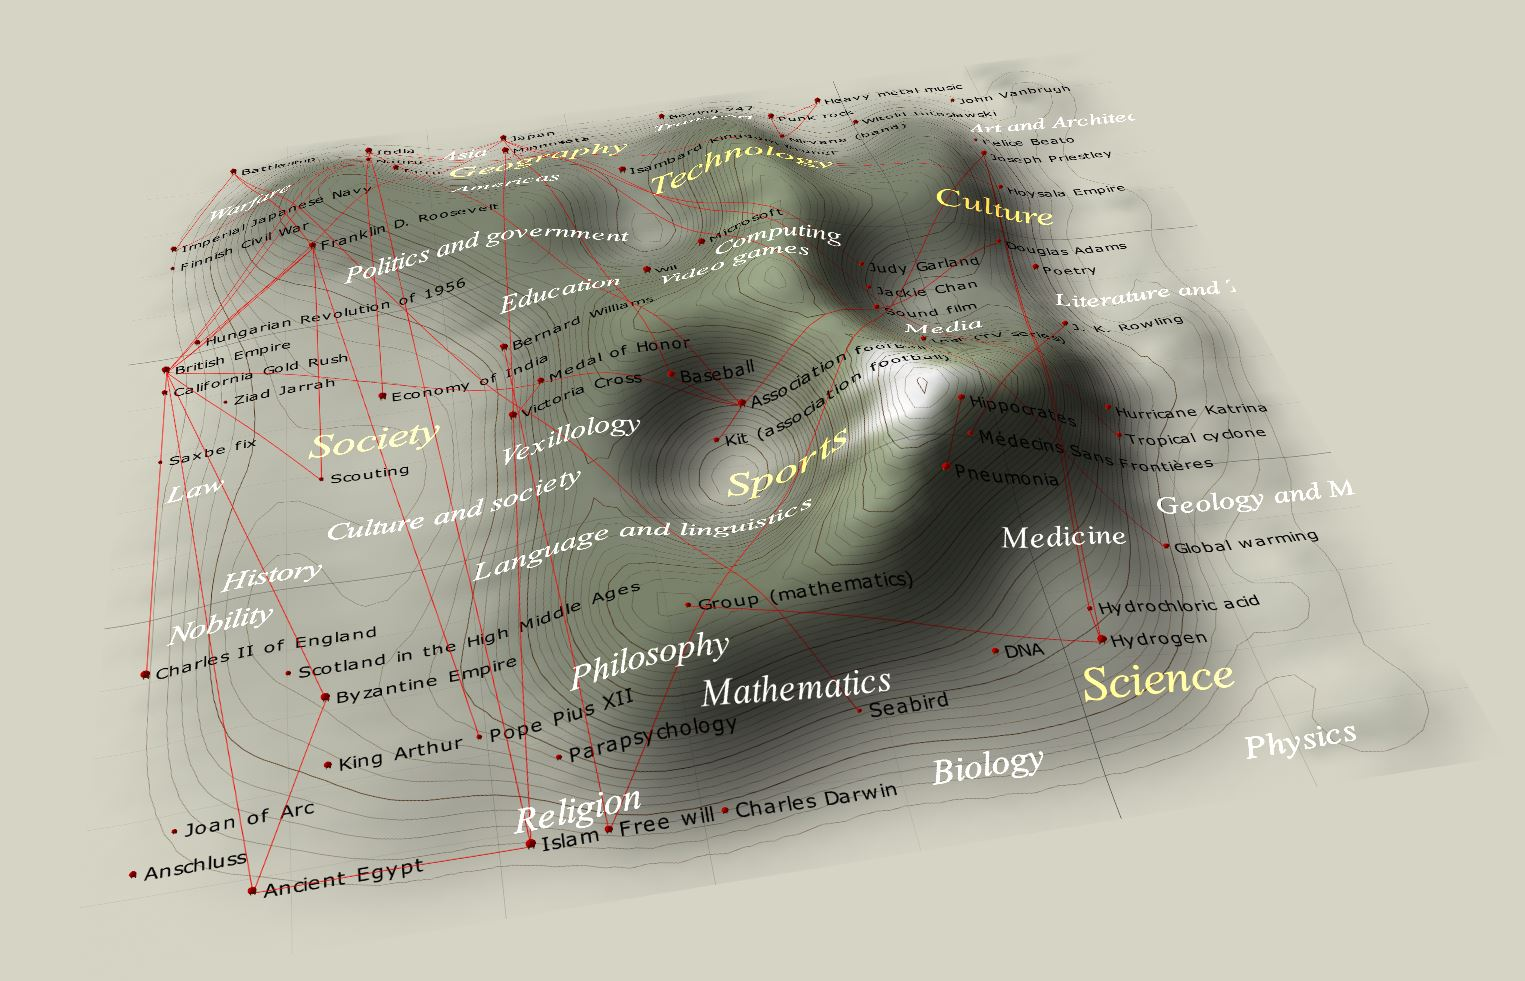

In [40]:
Image(filename="images/Self_oraganizing_map_cartography.jpg",width=620)

[Wikipedia] Cartographical representation of a self-organizing map (U-Matrix) based on Wikipedia featured article data (word frequency). Distance is inversely proportional to similarity. The "mountains" are edges between clusters. The red lines are links between articles.

## Mapping 2-dim. data in a 2-dim. network

In [34]:
def point():
    x=np.random.random()
    y=np.random.random()
    return np.array([x,y])

In [35]:
n=10
sam=np.array([func.point() for _ in range(n*n)])

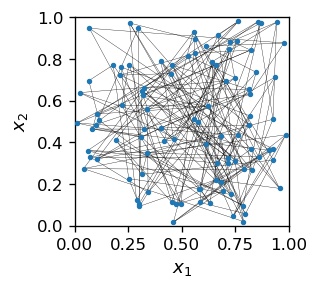

In [36]:
plt.figure(figsize=(2.3,2.3),dpi=120)

plt.xlim(0,1)
plt.ylim(0,1)
 
plt.scatter(sam[:,0],sam[:,1],s=5,zorder=3)

for j in range(n):       # rows
    for i in range(n-1): # columns
        plt.plot([sam[i+n*j,0],sam[i+1+n*j,0]],[sam[i+n*j,1],sam[i+1+n*j,1]],
                 linewidth=.2,c='black')

for j in range(n-1):       # rows
    for i in range(n): # columns
        plt.plot([sam[i+n*j,0],sam[i+n*(j+1),0]],[sam[i+n*j,1],sam[i+n*(j+1),1]],
                 linewidth=.2,c='black')
        
        
plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);    

In [37]:
eps=.5   # początkowa szybkość uczenia (0.5)
de = 3   # początkowy promień sąsiedztwa 
nr=400
rep= 300 # powtórzenia po próbce bez zmiany eps i de

In [38]:
for _ in range(nr):  # rundy z uaktualnieniem eps i de (100)
    eps=eps*.97      # uczenie słabnie z każdą rundą
    de=de*.98        # promień sąsiedztwa też maleje 
    for _ in range(rep):    # powtórz bez uaktualniania eps i de
        p=point() # punkt próbki
        dist=[func.eucl(p,sam[l]) for l in range(n*n)] 
          # tablica kwadratów euklidesowych odległości od p dla wsyzstkich neuronów
        ind_min = np.argmin(dist) # wskaźnik zwycięzcy
        ind_i=ind_min%n
        ind_j=ind_min//n       # tak trzeba wyłowić wskaźnik dwuwymiarowy (!)

        for j in range(n): 
            for i in range(n):
                sam[i+n*j]+=eps*phi2(ind_i,ind_j,i,j,de)*(p-sam[i+n*j]) 
                      # aktualizacja wg strategii "zwycięzca bierze wiekszość"
   

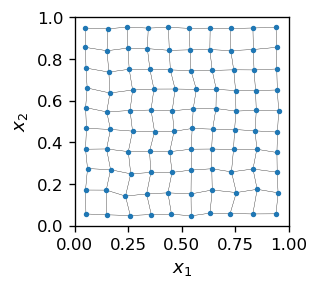

In [39]:
plt.figure(figsize=(2.3,2.3),dpi=120)

plt.xlim(0,1)
plt.ylim(0,1)
 
plt.scatter(sam[:,0],sam[:,1],s=5,zorder=3)

for j in range(n):       # rows
    for i in range(n-1): # columns
        plt.plot([sam[i+n*j,0],sam[i+1+n*j,0]],[sam[i+n*j,1],sam[i+1+n*j,1]],
                 linewidth=.2,c='black')

for j in range(n-1):       # rows
    for i in range(n): # columns
        plt.plot([sam[i+n*j,0],sam[i+n*(j+1),0]],[sam[i+n*j,1],sam[i+n*(j+1),1]],
                 linewidth=.2,c='black')
        
        
plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);    

## Topological properties

The $ f $ mapping
has the following **topological** property: if two neurons $ n_1 $ and $ n_2 $ are close to each other, then also $ d_1 = f (n_1) $ and $ d_2 = f (n_2) $ are close. As we will see, this allows for "transferring" of structures from the $ D $ data space to the $ N $ neuron space.

Such a mechanism takes place, for example, in the visual system ...

Topology of the vision

In this case, preserving the topology means that, for example, a retinal circle is mapped into a loop in the cerebral cortex. 

Mapping the retina into the visual area of the cerebral cortex

## Lateral inhibition

Final missing link: how to make the winner-take-all/most

:::{figure-md} lat-fig

<img src="images/lat2.png" width="170px">

Network with inter-neuron coupling used for modeling lateral inhibition.
:::

$$ 
y_i = s_i + \sum_{j\neq i} F_{ij} y_j.
$$

$$
\sum_j (\delta_{ij}-F_{ij}) y_j = s_i , ~~~s_i = x w_i, ~~~ F_{ii}=0.
$$

$$ (I-F) y = s $$

$$ y= (I-F)^{-1} s $$


Coupling (damping) matrix:

We will take, for example

$ F_ {ii} = $ 0,

$ F_ {ij} = - a \exp (- | i-j | / b) ~~ $ for $ i \neq j $, $ ~~ a, b> 0 $,

i.e. attenuation is strongest for close neighbors and it decreases with distance with a characteristic scale $b$.

In [41]:
ns = 30;       # number of neurons
b = 4;         # parameter controling the decrease of damping with distance
a = 1;         # magnitude of damping
eps = .1;      # coupling parameter

F=np.array([[-a*np.exp(-np.abs(i-j)/b) for i in range(ns)] for j in range(ns)]) 
                    # exponential fall-off
    
for i in range(ns):
    F[i][i]=0       # no self-damping
    

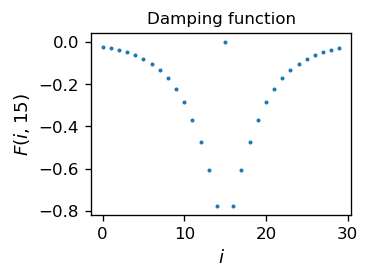

In [42]:
plt.figure(figsize=(2.8,2),dpi=120)
plt.title("Damping function",fontsize=10) 

ii=[i for i in range(ns)]
ff= [F[i][15] for i in range(ns)]

plt.scatter(ii,ff,s=2)

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$F(i,15)$',fontsize=11);    

In [43]:
s = np.array([2**2/((i - ns/2)**2 + 2**2) for i in range(ns)]) # Lorentzian function

invF=np.linalg.inv(np.identity(ns)-F) # matrix inversion
y=np.dot(invF,s)                      # multiplication
y=y/y[15]                             # normalization 

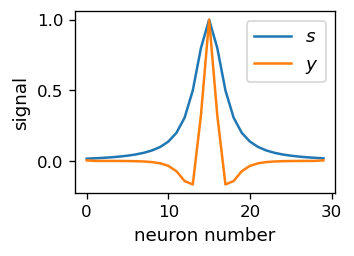

In [44]:
plt.figure(figsize=(2.8,2),dpi=120)

plt.plot(s)
plt.plot(y)
plt.legend(('$s$','$y$'),fontsize=11)
plt.xlabel('neuron number',fontsize=11)
plt.ylabel('signal',fontsize=11);    

Pyramidal neurons


```{admonition} Exercises
:class: warning

Construct a Kohonen mapping form a 2D shape (square, cicle, 2 disjoint squares) on a 2D grid of neurons.
```